# Exploring Community Engagement with StackExchange Fora

# Table of Contents

* Abstract
* Introduction
* Datasets: StackExchange
* Distributed Computing Technology
* Conclusion
* References
* Appendix

## Abstract - EDIT

Developing high-quality questions and procuring answers to these questions is not only fundamental to learning and information gathering, but to scientific and progress as a whole. Online question-answer communities and fora have given internet-users the unprecendented ability of presenting questions to the world, and while much attention has been given to finding the right answers (ask Google), relatively little attention has been dedicated to how we can improve questions. 

Since expert resources in technical question-answer communities are often scarce, having users produce relevant, legible and previously-researched questions is **particularly valuable to communities.** One way in which to promote this is to predict a question's quality or community engagement so that users can be nudged to improve aspects of their questions before adding demand to the expert resources in a community. With this goal in mind, this analysis critiques, **validates** and extends the methodology in previous research that has been focused on questions in question-answer communities. By harnessing the capability of distributed cloud computing, I am able to analyse the 10 largest **dedicated** question-answer communities **on the internet**.

## Introduction

This is a gooood research question because...

The ability to use cloud computing is cool because...

The analysis will proceed in the following steps:

* Fleshing out of datasets
* Fleshing out of Big Data Tech (PySpark...
* Elementary Exploratory Data Analysis (EDA) on 10 datasets
* Definition of binary response variable relating to high and low quality questions.
* Model prediction using binary response variable
* Results and conclusion


## Aim

The aim of the project is to explore how the top 10 largest Stack Exchange communities interact with questions. Firstly, I will perform EDA on all questions, answers and comments of the 10 large datasets. The second goal is to build a classification model on various different communities to identify questions with high potential of positive community engagement.

The classification model will use only the question text and title as input, deriving features using sentiment analysis and LDA. Positive community engagement will be summarised by PCA using the score of the question, the number of answers and the sentiment of the answers.

I will then test the individual models across all 10 communities to compare results. In this way I should gain insight into the degree to which StackExchange communities engage with questions homogenously.

## Distributed Computing Technologies

### SQL

A discussion of more advanced distributed computing techniques necessetates at least an introduction to Structured Query Languages

### Apache Spark

Spark is this and this and this.

Now you can use PySpark

You can invoke SparkContext as `sc`. `pyspark.SparkContext` is the main entry point for Spark functionality.

`pyspark.RDD` is the novel concept of Resilient Distributed Dataset (RDD) which is the basic abstraction in Spark.

The design for RDDs was intended to ensure fault-tolerance, distribution across **....** and in-memory computing.



You are also able to work with streaming data with `pyspark.streaming.StreamingContext` being the main entry point for the Spark Streaming capability.

`pyspark.streaming.DStream` is a Discretized Stream (DStream) which is the basic abstraction in Spark Streaming.

For the use of DataFrames and SQL, `pyspark.sql.SparkSession` is used where `pyspark.sql.DataFrame` serves as a distributed collection of data that grouped into named columns.

Since we will not be working with streaming data, I will mostly be using `pyspark.sql.DataFrame` objects, the user guide for which can be found [here](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#).




sqlContext is also automatically created in the PySpark session.

SparkSQL does this, that and that other thing.

### Gcloud discussion

**With the advent of dist. compt. and big data, growing research interest in powerful tech. using state-of-art computing capabilities to derive data insight.**

**Provide introduction of tech used?? Architecture, syntax, comparison to other S.Q.L.s?**

**List technologies used in this project, references, use Milan's slides**

Features of SparkSQL that make it so amazing

Gcloud offers different types of masters/workers as follows:

### Comparison to other BigData tech

Although a rule of thumb is that Spark is best-suited for real-time or streaming data processing where a large amount of RAM is accessible and Hadoop is more suitable for batch processing using commodity hardware, I chose to use Spark owing to the ease of use of PySpark and the SQL like API, **over some** imperative programming like Mapreduce.

## Datasets: 3 Large StackExchange Sites

The data I will use are community question-answering fora from the family of websites, [StackExchange](https://stackexchange.com/sites#traffic). StackExchange is a group of over 170 dedicated question-answer websites with topics ranging from vegetarianism to robotics to science-fiction world building - the computer coding/debugging forum StackOverflow being the **first** and largest with 10 million registered users and 18 million questions at the time of writing.

The data across all StackExchange sites are publicly available in **7z compressed** XML format at [archive.org](https://archive.org/download/stackexchange) and are regularly updated (the last update being **March 2019**. For each site, the following files are available:

* `PostHistory.xml`: A history of the versions of each question and answer posted (questions can be edited)
* `Posts.xml`: The final, up to date version of each question and answer posted
* `Users.xml`: Data on registered users 
* `Votes.xml`: Data on **votes cast??**
* `Comments.xml`: The final, up to date version of each comment posted
* `Badges.xml`: Log of when badges (an incentive mechanism) were awarded to users for specific achievements
* `PostLinks.xml`: **URL links in posts??**
* `Tags.xml`: Data on the tags **in tandem** with each question posted

As this is an initial analysis, I will only be using the `Posts.xml` data for each forum. In this file, the following variables are recorded per question posted:

* `Id`: A chronological post identity variable
* `PostTypeId`: An indicator of whether the post is an question (==1) or an answer (==2) **as well as other values**
* `ParentId`: An indicator of which question and answer belongs to (only answers)
* `AcceptedAnswerId`: An indicator of which answer the original question poster selected as accepted (only questions)
* `CreationDate`: A date variable relating to when the post was made
* `Score`: The difference between up-votes and down-votes for posts
* `ViewCount`: The number of times that a post has been viewed by registered and non-registered users alike
* `Body`: The main post content
* `OwnerUserId`: A identity variable for the post owner
* `LastEditorUserId`: A identity number for the last registered user that edited the post
* `LastEditDate`: A date variable relating to when the post was last edited
* `LastActivityDate`: A date variable relating to when last there was activity on the post
* `Title`: The post title for questions only
* `Tags`: The collection of tags linked to a question
* `AnswerCount`: The number of answers that a question receives (questions only)
* `CommentCount`: The number of comments that a post receives
* `FavoriteCount`: The number of times that users have favourited a question (questions only)
* `ClosedDate`: A boolean relating to whether a question has been closed or not (questions only)

Note that post above refers to both question and answer.

Users can upvote posts and can have reputation.

Score distribution is highly skewed - users can upvote at 15, downvote at 125

The variables that are important to this analysis are: 

The datasets were downloaded with the following bash script, run when the gcloud cluster is created:

```bash
## install unzipper
sudo apt-get install --yes p7zip-full

## create folder and datasets array (separate approach for stackoverflow.com-Posts.7z)
mkdir datasets && cd datasets

declare -a arr=(
"askubuntu.com"
"codereview.stackexchange.com"
"math.stackexchange.com"
"physics.stackexchange.com"
"ru.stackoverflow.com"
"serverfault.com"
"stackoverflow.com-Posts"
"superuser.com"
"tex.stackexchange.com"
"unix.stackexchange.com"
)

## loop downloading, unzipping and extracting all XML data
for i in "${arr[@]}"
do
   mkdir "$i" && cd "$i"
   wget https://archive.org/download/stackexchange/"$i".7z
   p7zip -d "$i".7z
   
   cd ..
done

## rename folders for ease of import later
mv stackoverflow.com-Posts stackoverflow.stackexchange.com
mv superuser.com superuser.stackexchange.com
mv askubuntu.com askubuntu.stackexchange.com
mv serverfault.com serverfault.stackexchange.com
mv ru.stackoverflow.com rus_stackoverflow.stackexchange.com

cd

## copy datasets folder over to bucket
gsutil cp -r datasets gs://bucket-brad/datasets
```

## Cluster and Environment Setup

I used the following code enter into my terminal to spin up a custom cluster on Gcloud:

```bash
## set project beforehand
gcloud config list
export PROJECT="stack-exchange-project"
gcloud config set project ${PROJECT}

## set variables beforehand
export NUM_WORKERS="2"
export BUCKET="bucket-brad-project"
export CLUSTER="cluster-brad"

## spin up cluster
gcloud dataproc clusters create ${CLUSTER} \
--properties=^#^spark:spark.jars.packages=com.databricks:spark-xml_2.11:0.4.1 \
 --subnet default --zone europe-west2-a --master-machine-type n1-highmem-96 \
 --master-boot-disk-size 500 --num-workers=${NUM_WORKERS} --worker-machine-type n1-highmem-16 \
 --worker-boot-disk-size 500 --image-version 1.3-deb9 --project=${PROJECT} --bucket=${BUCKET} \
 --initialization-actions 'gs://dataproc-initialization-actions/jupyter/jupyter.sh',\
'gs://dataproc-initialization-actions/python/pip-install.sh','gs://bucket-brad-project/my-actions.sh' \
--metadata 'PIP_PACKAGES=sklearn nltk pandas'

## connect to jupyter notebook
export PORT=8123
export ZONE="europe-west2-a"
export HOSTNAME=cluster-brad-m

gcloud compute ssh ${HOSTNAME} \
    --project=${PROJECT} --zone=${ZONE}  -- \
    -D ${PORT} -N &

"/Applications/Google Chrome.app/Contents/MacOS/Google Chrome" \
      --proxy-server="socks5://localhost:${PORT}" \
      --user-data-dir=/tmp/${HOSTNAME}
```
```bash
## delete clusters after use
gcloud dataproc clusters delete cluster-brad
```

Note that I used a high-memory master node with 96 CPUs and two high-memory worker nodes with 16 CPUs each. In order to have access to this level of computing, I had to request an increase in my quotas from Google.

---

## Importing and Setup

In [1]:
## testing printing output from console
import subprocess
cmd = [ 'echo', '"Welcome to my notebook"' ]
output = subprocess.Popen( cmd, stdout=subprocess.PIPE ).communicate()[0]
print(output)

b'"Welcome to my notebook"\n'


In [2]:
## use com.databricks package
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.4.1 pyspark-shell'

In [3]:
## restart kernel
#os._exit(00)

In [4]:
## import standard libraries
import re
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

## import pyspark elements
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
from pyspark.sql.functions import col, lit, when
from pyspark.sql import Row

## import natural language processing elements
import nltk
#nltk.download('all') # uncomment first run as admin check
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop_words = set(stopwords.words('english'))
table = str.maketrans('', '', string.punctuation)
lmtzr = WordNetLemmatizer()

## function to tokenise and lemmatise
def get_tokens(line):
    ###
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuations from each word
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    # lemmatizing the words, see https://en.wikipedia.org/wiki/Lemmatisation
    words = [lmtzr.lemmatize(w) for w in words]
    return (words)

## set checkpoint directory
sc.setCheckpointDir("gs://bucket-brad-project/tmp/")

In [5]:
## check default number of partitions
sc.defaultParallelism

8

## Loading Data

In [11]:
## choose datasets to compare
data_array = [
#"askubuntu",
"codereview",
#"math",
"physics",
#"rus_stackoverflow",
#"serverfault",
#"stackoverflow",
#"superuser",
#"tex",
"unix"    
]

In [12]:
## point to right directory
fpath = 'gs://bucket-brad-project/datasets/large-datasets/'

## function to extract data from xml files
def load_all_xml(table_name):
    # create dataframe list skeleton
    dfs = {}
    xml_name = table_name.capitalize()
    for i in data_array:
        table = sqlContext.read.format('com.databricks.spark.xml').options(rowTag=table_name).load(fpath+i+'.stackexchange.com/'+xml_name+'.xml')
        rdd_table = table.rdd.flatMap(lambda x: x).flatMap(lambda x: x)
        # assign dataframe to list entry
        dfs[i] = sqlContext.createDataFrame(rdd_table, table.schema.fields[0].dataType.elementType)
        dfs[i].createOrReplaceTempView(table_name)
    return dfs

In [13]:
## display architecture (must find workers as well)
import multiprocessing
print("Number of CPUs master node:", multiprocessing.cpu_count())

#import sigar
#sg = sigar.open()
#mem = sg.mem()
#sg.close() 
#print(mem.total()/1024, mem.free()/1024)

Number of CPUs master node: 96


A substantial amount of time was spent testing out cluster architectures since just the loading in of the **smaller** datasets were taking a substantial amount of time. 

At the end of the day, I decided to scale mostly vertically, as well as horizontally, resulting in a high-memory master node with **96 CPUs and two high-memory worker nodes with 16 CPUs each**.

Examples of the times taken to read in only the respective forums are displayed in the comments below, where this is how the architecture is described:

`# CPUs master; number of workers x CPUs workers`

where `hc` stands for high cpu and `hm` stands for high memory. 

In [14]:
## start time
t0 = time.time()
print(datetime.now().time())

## extract all datasets and store in list of dataframes
posts_dfs = load_all_xml("posts")

## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") 
# hc32;4xhc8 - more than 7 minutes codereview
# hc32;7x4 - 6.57 minutes codereview
# hm32;2x8 - 4.18 minutes codereview
# 32;2x4 - 3.83 minutes codereview
# hc32;2x4 - 3.78 minutes codereview
# 64;2x4 - 3.73 minutes codereview
# hm32;2x4 - 3.68 minutes codereview
# hm96;2xhm16 - 3.85 minutes codereview
# hm96;2xhm16 - 11.86 minutes codereview, physics and unix

12:16:52.041164
Time taken: 11.866666666666667 minutes.


It appears that **memory** was the resource needed in this step.

Interestingly, the data is initially in raw XML format which is considered **semi-structured** since it contains tags/markers to enforce hierarchy of entries. This then gets stored in a `pyspark.sql.DataFrame` which has a schema and is thus **structured**, but the final `Body` variable I will work with is completely **unstructured** since as text it is not organised in any manner.

# Exploratory Data Analysis

In [15]:
# print type of posts_dfs
print(type(posts_dfs))
print('\n')

# print type of first dataframe
print(type(posts_dfs["codereview"]))
print('\n')

# schema of first dataframe
posts_dfs["codereview"].printSchema()

<class 'dict'>


<class 'pyspark.sql.dataframe.DataFrame'>


root
 |-- _AcceptedAnswerId: long (nullable = true)
 |-- _AnswerCount: long (nullable = true)
 |-- _Body: string (nullable = true)
 |-- _ClosedDate: string (nullable = true)
 |-- _CommentCount: long (nullable = true)
 |-- _CommunityOwnedDate: string (nullable = true)
 |-- _CreationDate: string (nullable = true)
 |-- _FavoriteCount: long (nullable = true)
 |-- _Id: long (nullable = true)
 |-- _LastActivityDate: string (nullable = true)
 |-- _LastEditDate: string (nullable = true)
 |-- _LastEditorDisplayName: string (nullable = true)
 |-- _LastEditorUserId: long (nullable = true)
 |-- _OwnerDisplayName: string (nullable = true)
 |-- _OwnerUserId: long (nullable = true)
 |-- _ParentId: long (nullable = true)
 |-- _PostTypeId: long (nullable = true)
 |-- _Score: long (nullable = true)
 |-- _Tags: string (nullable = true)
 |-- _Title: string (nullable = true)
 |-- _VALUE: string (nullable = true)
 |-- _ViewCount: long (nullable = 

In [16]:
## FIX THIS CELL

## start time
t0 = time.time()
print(datetime.now().time())

for i in data_array:
    print("\n------------------\n", i, "\n------------------\n")
    print(posts_dfs[i].describe())
    
## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") #hm96;2xhm16 - 5.6 minutes codereview

12:29:45.174618

------------------
 codereview 
------------------

DataFrame[summary: string, _AcceptedAnswerId: string, _AnswerCount: string, _Body: string, _ClosedDate: string, _CommentCount: string, _CommunityOwnedDate: string, _CreationDate: string, _FavoriteCount: string, _Id: string, _LastActivityDate: string, _LastEditDate: string, _LastEditorDisplayName: string, _LastEditorUserId: string, _OwnerDisplayName: string, _OwnerUserId: string, _ParentId: string, _PostTypeId: string, _Score: string, _Tags: string, _Title: string, _VALUE: string, _ViewCount: string]

------------------
 physics 
------------------



KeyboardInterrupt: 

In [ ]:
## empty dictionary of df skeleton
plot_data = {}

## start time
t0 = time.time()
print(datetime.now().time())

## total number of posts of fora
for i in data_array:
    plot_data[i] = posts_dfs[i].count()

## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") # hm96;2xhm16 - 5.85 minutes codereview
    
## bar plot of post counts in descending order
import operator
plot_list = sorted(plot_data.items(), key=operator.itemgetter(1), reverse=True)
x, y = zip(*plot_list) # unpack a list of pairs into two tuples
plt.bar(x, y, align='center', alpha=.8)
plt.xticks(range(len(plot_list)), list([i[0] for i in plot_list]), rotation=90)
plt.title('The total number of posts')
plt.show()

12:38:36.974593
Time taken: 24 minutes.


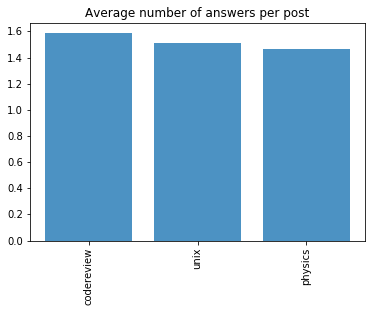

In [17]:
## empty dictionary of df skeleton
plot_data = {}

## start time
t0 = time.time()
print(datetime.now().time())

## total number of answers per post of fora
for i in data_array:
    plot_data[i] = posts_dfs[i].groupBy().avg('_AnswerCount').collect()[0][0]

## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") # hm96;2xhm16 - 24 minutes codereview, physics, unix
    
## bar plot of answers per post in descending order
import operator
plot_list = sorted(plot_data.items(), key=operator.itemgetter(1), reverse=True)
x, y = zip(*plot_list) # unpack a list of pairs into two tuples
plt.bar(x, y, align='center', alpha=.8)
plt.xticks(range(len(plot_list)), list([i[0] for i in plot_list]), rotation=90)
plt.title('Average number of answers per post')
plt.show()

In [ ]:
## empty dictionary of df skeleton
plot_data = {}

## start time
t0 = time.time()
print(datetime.now().time())

## total number of comments per post of fora
for i in data_array:
    plot_data[i] = posts_dfs[i].groupBy().avg('_CommentCount').collect()[0][0]

## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") #5 workers - 73 minutesseconds
    
## bar plot of comments per post in descending order
import operator
plot_list = sorted(plot_data.items(), key=operator.itemgetter(1), reverse=True)
x, y = zip(*plot_list) # unpack a list of pairs into two tuples
plt.bar(x, y, align='center', alpha=.8)
plt.xticks(range(len(plot_list)), list([i[0] for i in plot_list]), rotation=90)
plt.title('Average number of comments per post')
plt.show()

13:02:21.688652


In [ ]:
## empty dictionary of df skeleton
plot_data = {}

## start time
t0 = time.time()
print(datetime.now().time())

## average score per post across fora
for i in data_array:
    plot_data[i] = posts_dfs[i].groupBy().avg('_Score').collect()[0][0]

## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") #5 workers - 74 minutes
    
## bar plot of score per post in descending order
import operator
plot_list = sorted(plot_data.items(), key=operator.itemgetter(1), reverse=True)
x, y = zip(*plot_list) # unpack a list of pairs into two tuples
plt.bar(x, y, align='center', alpha=.8)
plt.xticks(range(len(plot_list)), list([i[0] for i in plot_list]), rotation=90)
plt.title('Average score per post')
plt.show()

In [ ]:
## empty dictionary of df skeleton
plot_data = {}

## start time
t0 = time.time()
print(datetime.now().time())

## average viewcount per post across fora
for i in data_array:
    plot_data[i] = posts_dfs[i].groupBy().avg('_ViewCount').collect()[0][0]

## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") #5 workers - 75 minutesseconds
    
## bar plot of viewcount per post in descending order
import operator
plot_list = sorted(plot_data.items(), key=operator.itemgetter(1), reverse=True)
x, y = zip(*plot_list) # unpack a list of pairs into two tuples
plt.bar(x, y, align='center', alpha=.8)
plt.xticks(range(len(plot_list)), list([i[0] for i in plot_list]), rotation=90)
plt.title('Viewcount per post')
plt.show()

In [ ]:
## start time
t0 = time.time()
print(datetime.now().time())

## create plot data for cumulative viewcount
plot_data = {}
for i in data_array:
    plot_data[i] = posts_dfs[i].select('_ViewCount').rdd.flatMap(lambda x: x).collect()
    plot_data[i] = [x for x in plot_data[i] if x is not None]
    
## end time
T = time.time() - t0;
print("Time taken:", round(T/60), "minutes.") #5 workers - 73 minutesseconds

## plot cumulative distribution of viewcount across fora
n_bins = 500000
fig, ax = plt.subplots(figsize=(16, 8))
for i in data_array:
    n, bins, patches = ax.hist(plot_data[i], n_bins, density=True, histtype='step',
                               cumulative=True, label=i)
ax.grid(True)
ax.set_xscale('log')
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('ViewCount')
ax.set_ylabel('Cumulative percentage of question posts')
plt.show()

# Natural Language Processing

In [ ]:
body_data = {}
for i in data_array:
    body_data[i] = posts_dfs[i].select("_Body").rdd.flatMap(lambda r: r)

In [ ]:
body_data['expatriates'].take(1)

### Tokenise and lemmatise

In [ ]:
body_rdd = {}
for i in data_array:
    body_rdd[i] = body_data[i].map(lambda line: (1, get_tokens(line)))

In [ ]:
body_rdd['expatriates'].take(1)[0][1][:10]

In [ ]:
### WHAT IF DIFFERENT THRESHOLDS ??? NEED number of tokens per fora

doc_stop_words = {}
for i in data_array:
    doc_stop_words[i] = body_rdd[i].flatMap(lambda r: r[1]).map(lambda r: (r,1)).reduceByKey(lambda a,b: a+b)
    # here we assume that words that appear very frequently are stop words. We use 3000 as a threshold.
    doc_stop_words[i] = doc_stop_words[i].filter(lambda a: a[1]>3000).map(lambda r: r[0]).collect()
    body_rdd[i] = body_rdd[i].map(lambda r: (r[0],[w for w in r[1] if not w in doc_stop_words[i] and not len(w)==1]))

In [ ]:
body_rdd['expatriates'].collect()

### Convert tokens into sparse vectors

In [ ]:
from pyspark.ml.feature import CountVectorizer
from pyspark.sql.functions import monotonically_increasing_id

body_df = {}
for i in data_array:
    body_df[i] = spark.createDataFrame(body_rdd[i], ["dummy","words"])
    body_df[i].cache()

body_df['expatriates'].take(1)

### Now, we generate vectors that are histograms of word counts associated with each message

In [ ]:
cntvcr = CountVectorizer(inputCol="words", outputCol="features", minDF=2)

cntvcr_models = {}
word_feat_list = {}
for i in data_array:
    cntvcr_models[i] = cntvcr.fit(body_df[i])
    word_feat_list[i] = cntvcr_models[i].transform(body_df[i])
    word_feat_list[i].cache()
    
word_feat_list['expatriates'].show(10)

### Convert pyspark.ml vectors to pyspark.mllib vectors

In [ ]:
from pyspark.mllib.linalg import Vectors
#from pyspark.ml import linalg as ml_linalg
def as_mllib_vector(v):
    return Vectors.sparse(v.size, v.indices, v.values)

features = {}
feature_vec_list = {}
for i in data_array:
    features[i] = word_feat_list[i].select("features")
    feature_vec_list[i] = features[i].rdd.map(lambda r: as_mllib_vector(r[0]))
    feature_vec_list[i].cache()

feature_vec_list['expatriates'].take(1)

### Take a look at the vocabulary

In [ ]:
print ("Vocabulary from CountVectorizerModel is:\n")
print(cntvcr_models['expatriates'].vocabulary[:100])
print("\n---\n")

M = len(cntvcr_models['expatriates'].vocabulary)
print("Number of terms M = ", M)

###  Latent Semantic Analysis

In [ ]:
from pyspark.mllib.linalg.distributed import RowMatrix

feature_mat_list = {}
for i in data_array:
    feature_mat_list[i] = RowMatrix(feature_vec_list[i])

# Here we use the dimension of latent factors to be k
k = 5
feature_svd_list = {}
U_list = {}
s_list = {}
V_list = {}
for i in data_array:
    feature_svd_list[i] = feature_mat_list[i].computeSVD(5, computeU=True)
    U_list[i] = feature_svd_list[i].U       # The U factor is a RowMatrix.
    s_list[i] = feature_svd_list[i].s       # The singular values are stored in a local dense vector.
    V_list[i] = feature_svd_list[i].V       # The V factor is a local dense matrix.

In [ ]:
print("number of rows of U", U_list['expatriates'].numRows()) # this is the number of documents (N)
print("number of rows of V", V_list['expatriates'].numRows ) # this is the number of terms (M)

In [ ]:
collected = U_list['expatriates'].rows.take(10)

print("U factors for expatriate forum are:")
for vector in collected:
    print(vector)
    
print("Singular values are: \n", s_list['expatriates'])

print("V factors are: \n", V_list['expatriates'])

### Plot

In [ ]:
from sklearn.manifold import TSNE

collected_list = {}
Uarray_list = {}
Uembedded_list = {}

for i in data_array:
    collected_list[i] = U_list[i].rows.collect()
    Uarray_list[i] = np.array([[x[i] for i in range(k)] for x in collected_list[i]]) # unpack strange spark vectors
    t_sne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='random')
    Uembedded_list[i] = t_sne_model.fit_transform(Uarray_list[i])

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(16, 8))

j = 1
for i in data_array:
    plt.subplot(2, 6, j)
    plt.scatter(Uembedded_list[i][:,0],Uembedded_list[i][:,1], color="bgrcmykbgrcmyk"[j], alpha=0.1)
    j = j+1
#    np.shape(Uembedded_list[i])
    #plt.scatter(Uembedded_list[i][:,0],Uembedded_list[i][:,1],alpha=.2)

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(16, 8))

j = 1
for i in data_array:
    plt.subplot(2, 6, j)
    plt.scatter(Uarray_list[i][:,0],Uarray_list[i][:,1],alpha=.1)
    plt.scatter(Uarray_list[i][:,0],Uarray_list[i][:,2],alpha=.1)
    plt.scatter(Uarray_list[i][:,0],Uarray_list[i][:,3],alpha=.1)
    j = j+1
#    np.shape(Uembedded_list[i])
    #plt.scatter(Uembedded_list[i][:,0],Uembedded_list[i][:,1],alpha=.2)

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(16, 8))

j = 1
for i in data_array:
    plt.subplot(2, 6, j)
    plt.scatter(Uarray_list[i][:,1],Uarray_list[i][:,2],alpha=.1)
    plt.scatter(Uarray_list[i][:,1],Uarray_list[i][:,3],alpha=.1)
    j = j+1
#    np.shape(Uembedded_list[i])
    #plt.scatter(Uembedded_list[i][:,0],Uembedded_list[i][:,1],alpha=.2)

plt.show()

It is not true that few messages account for a large fraction of variability

# Modeling

First we gotta choose a viewcount threshold to address possibility of users that can vote not seeing question:

Then we gotta choose the threshold for the binary labelling of question:

## Latent Dirichlet Allocation

In [ ]:
from pyspark.ml.clustering import LDA

lda = LDA(k=5, maxIter=5)

lda_model_list = {}
for i in data_array:
    lda_model_list[i] = lda.fit(word_feat_list[i])

In [ ]:
loglik_list = {}
logper_list = {}
for i in data_array:
    loglik_list[i] = lda_model_list[i].logLikelihood(word_feat_list[i])
    logper_list[i] = lda_model_list[i].logPerplexity(word_feat_list[i])

In [ ]:
for i in data_array:
    print("The lower bound on the log likelihood of the " +'\033[1m'+ i +'\033[0m'+ " corpus is: " + str(loglik_list[i]))
    print("The upper bound on the perplexity of the " +'\033[1m'+ i +'\033[0m'+ " corpus is: " + str(logper_list[i]))
    print('\n')

In [ ]:
### REMOVE HTML STUFF!

# describe topics
topic_list = {}
for i in data_array:
    print(i)
    topic_list[i] = lda_model_list[i].describeTopics(5)
    #print("The topics described by their top-weighted terms:\n")
    #topic_list[i].show(truncate=False)
    # show the results
    topic_j = topic_list[i].select("termIndices").rdd.map(lambda r: r[0]).collect()
    for j in topic_j:
        print(np.array(cntvcr_models[i].vocabulary)[j])
    print('\n')

## Conclusion

## References